In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def f(x):
    return 3*x**2 - 4*x + 5

In [ ]:
f(3.0)

In [ ]:
xs = np.arange(-5,5,0.25)
ys = f(xs)

In [ ]:
plt.plot(xs,ys)

In [ ]:
h=0.0001
x=3.0
(f(x+h)-f(x))/h

In [ ]:
a = 2.0
b = -3.0
c = 10.0 
d = a*b + c
print(d)

In [ ]:
da=(a+h)*b+c

In [ ]:
(da-d)/h

In [ ]:
db=a*(b+h)+c

In [ ]:
(db-d)/h

In [ ]:
dc=a*b+(c+h)

In [ ]:
(dc-d)/h

In [7]:
class Value:
    def __init__(self, data, label='', _children=(), _op=''):
        self.data = data
        self.grad = 0
        self.label = label
        self._prev = set(_children)
        self._op = _op
    
    def __repr__(self):
        return f"Value(label={self.label},data={self.data:.4f},op={self._op})"
    
    def __add__(self, other):
        if isinstance(other, Value):
            out = Value(self.data + other.data, '', (self, other), '+')
        else:
            out = Value(self.data + other, '', (self, other), '+')
        return out
    
    def __radd__(self, other):
        return self.__add__( Value(other, str(other), (), '+') )
    
    def __mul__(self, other):
        if isinstance(other, Value):
            out = Value(self.data * other.data, '', (self,other), '*')
        else:
            out = Value(self.data * other, '', (self,other), '*')
        return out
    
    def __rmul__(self, other):
        return self.__mul__( Value(other, str(other), (), '*') )

In [8]:
a = Value(2.0, 'a')
b = Value(-3.0, 'b')
c = Value(10.0, 'c')
f = Value(-2.0, 'f')

e=a*b; e.label='e'
d=e+c; d.label='d'
L = d*f; L.label='L'

L.grad=1.0
f.grad=d.data
d.grad=f.data
c.grad=d.grad*1.0
e.grad=d.grad*1.0
a.grad=e.grad*b.data
b.grad=e.grad*a.data

In [9]:
from graphviz import Digraph

def trace_graph (root):
    nodes = set()
    edges = set()

    def build(n):
        for p in n._prev:
            edges.add((p,n))
            build(p)        
        nodes.add(n)
    build(root)
    return nodes, edges

def draw_graph(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

    nodes, edges = trace_graph(root)    
    for n in nodes:
        dot.node(name=str(id(n)), label="{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n))+n._op, label=f"{n._op}")
            dot.edge(str(id(n))+n._op, str(id(n)))

    for (n1,n2) in edges:
        dot.edge(str(id(n1)), str(id(n2))+n2._op)
        
    return dot

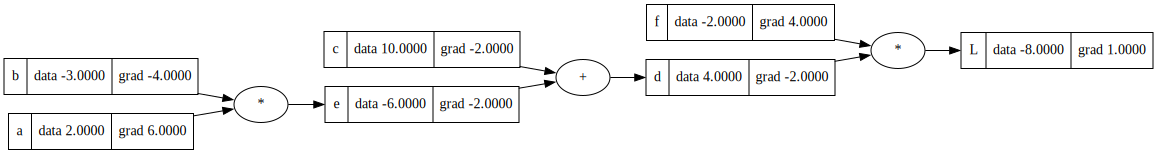

In [10]:
draw_graph(L)

In [44]:
def lol():
    
    a = Value(2.0, 'a')
    b = Value(-3.0, 'b')
    c = Value(10.0, 'c')
    f = Value(-2.0, 'f')

    e=a*b; e.label='e'
    d=e+c; d.label='d'
    L=d*f; L.label='L'

    L.grad=1.0
    f.grad=d.data
    d.grad=f.data
    c.grad=d.grad*1.0
    e.grad=d.grad*1.0
    a.grad=e.grad*b.data
    b.grad=e.grad*a.data

    
    def fwd_pass():
        nonlocal a,b,c,d,e,f,L
        L1=L.data
        e=a*b;
        d=e+c;
        L=d*f;
        return L.data
    
    def reset():
        nonlocal a,b,c,d,e,f,L
        a.data=2.0
        b.data=-3.0
        c.data=10.0
        f.data=-2.0
        return fwd_pass()

    h=0.01

    a.data+=h*a.grad
    print(f"Changed a to {a.data}, whose grad is {a.grad}. Loss changed to {fwd_pass()}")
    print(f"Loss reset to {reset()}, a reset to {a.data}")

    b.data+=h*b.grad
    print(f"Changed b to {b.data}, whose grad is {b.grad}. Loss changed to {fwd_pass()}")
    print(f"Loss reset to {reset()}, b reset to {b.data}")

    c.data+=h*c.grad
    print(f"Changed c to {c.data}, whose grad is {c.grad}. Loss changed to {fwd_pass()}")
    print(f"Loss reset to {reset()}, c reset to {c.data}")

    f.data+=h*f.grad
    print(f"Changed f to {f.data}, whose grad is {f.grad}. Loss changed to {fwd_pass()}")
    print(f"Loss reset to {reset()}, f reset to {f.data}")
    
lol()

Changed a to 2.06, whose grad is 6.0. Loss changed to -7.640000000000001
Loss reset to -8.0, a reset to 2.0
Changed b to -3.04, whose grad is -4.0. Loss changed to -7.84
Loss reset to -8.0, b reset to -3.0
Changed c to 9.98, whose grad is -2.0. Loss changed to -7.960000000000001
Loss reset to -8.0, c reset to 10.0
Changed f to -1.96, whose grad is 4.0. Loss changed to -7.84
Loss reset to -8.0, f reset to -2.0


In [ ]:
a += 0.01 * a.grad
# b += 0.01 * b.grad
c += 0.01 * c.grad
f += 0.01 * f.grad


e=a*b; e.label='e'
d=e+c; d.label='d'
L = d*f; L.label='L'